In [2]:
import torch
import torch.nn.init as init
from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.transforms as transforms
torch.manual_seed(8)

import numpy as np

import glog
import time
from tensorboardX import SummaryWriter

writer = SummaryWriter()

### 1. Loading MNIST dataset

torch.Size([60000, 28, 28])
torch.Size([60000])


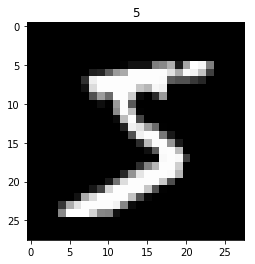

In [11]:
"""download the dataset and set dataloader"""
import torchvision.datasets as dsets

batch_size = 100

trainset = dsets.MNIST(root = 'data/', train = True,
                       transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                           shuffle=True, num_workers=2)

testset = dsets.MNIST(root = 'data/', train = False,
                      transform = transforms.ToTensor(), download = True)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

print(trainset.train_data.size())
print(trainset.train_labels.size())


"""ploating first image and label of train set"""
import matplotlib.pyplot as plt

idx = 0
plt.imshow(trainset.train_data[idx,:,:].numpy(),cmap='gray')
plt.title('%i' %trainset.train_labels[idx])
plt.show()

torch.Size([100, 1, 28, 28])
torch.Size([100])


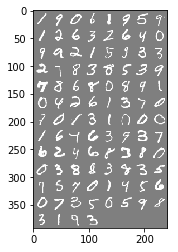

[1 9 0 6 1 9 5 9 1 2 6 3 2 6 4 0 9 9 2 1 5 9 3 3 2 7 8 3 8 5 3 9 7 8 6 8 0
 8 9 1 0 4 2 6 1 3 7 0 7 0 1 3 1 0 0 0 1 6 7 6 3 9 3 7 6 2 4 6 8 3 8 0 0 3
 8 8 3 8 3 5 7 5 7 0 1 4 5 6 0 7 3 5 0 5 9 8 3 1 9 3]


In [12]:
"""ploating batch images and labels"""

def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

batch_images, batch_labels = next(iter(train_loader))

print(batch_images.size())
print(batch_labels.size())

imshow(utils.make_grid(batch_images))
print(batch_labels.numpy())

### 2. Define Neural Network

In [13]:
linear1 = torch.nn.Linear(784,512,bias=True)
linear2 = torch.nn.Linear(512,10,bias=True)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1,relu,linear2)
    
print(model)

loss_func = torch.nn.CrossEntropyLoss() #including softmax

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=True)
)


### 3. Train the Network

In [15]:
"""hyperparameters"""

learning_rate = 0.001
training_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


"""training"""

for epoch in range(training_epochs):
    avg_loss = 0
    total_batch = len(trainset)//batch_size
    start_time = time.time()
    
    for i, (batch_images,batch_labels) in enumerate(train_loader):
        X = Variable(batch_images.view(-1,28*28))
        Y = Variable(batch_labels)
    
        optimizer.zero_grad()
        Y_prediction = model(X)
        loss = loss_func(Y_prediction,Y)
        loss.backward()
        optimizer.step()
        
        avg_loss += loss/total_batch
        writer.add_scalar('Train/Loss', loss, epoch*batch_size+i)

    print("[Epoch: {}] cost = {}".format(epoch+1, avg_loss.data[0].item()))
    print("         training takes {} secs".format(time.time()-start_time))
    
print("Learning finished!")

W0723 16:37:43.884586 42207 warnings.py:99] /Users/namjuhyeon/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



[Epoch: 1] cost = 0.2868266701698303
         training takes 7.432463884353638 secs
[Epoch: 2] cost = 0.11717309802770615
         training takes 7.763728141784668 secs
[Epoch: 3] cost = 0.07590185105800629
         training takes 7.901408910751343 secs
[Epoch: 4] cost = 0.05392028018832207
         training takes 8.122360944747925 secs
[Epoch: 5] cost = 0.03922678530216217
         training takes 8.002316951751709 secs
Learning finished!


In [16]:
#Saving model

print("Saving model...")
torch.save(model.state_dict(),'model.pkl')
print("Model is saved!")

Saving model...
Model is saved!


In [18]:
#Measuring performance
correct = 0
total = 0
for images, labels in testset:
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
